In [51]:
import seaborn as sns
import plotnine as p9
import polars as pl
import polars.selectors as cs
import matplotlib.pyplot as plt

In [52]:
(homes := 
 pl.read_csv('./data/Saratoga_NY_Homes.csv')
)

Price,Lot.Size,Waterfront,Age,Land.Value,New.Construct,Central.Air,Fuel.Type,Heat.Type,Sewer.Type,Living.Area,Pct.College,Bedrooms,Fireplaces,Bathrooms,Rooms,Fireplaces?
i64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,i64,i64
132500,0.09,0,42,50000,0,0,3,4,2,906,35,2,1,1.0,5,1
181115,0.92,0,0,22300,0,0,2,3,2,1953,51,3,0,2.5,6,0
109000,0.19,0,133,7300,0,0,2,3,3,1944,51,4,1,1.0,8,1
155000,0.41,0,13,18700,0,0,2,2,2,1944,51,3,1,1.5,5,1
86060,0.11,0,0,15000,1,1,2,2,3,840,51,2,0,1.0,3,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
289000,0.38,0,32,24200,0,0,2,3,3,2310,61,5,1,2.5,11,1
285000,0.94,0,37,36200,0,0,2,3,3,2564,61,4,1,2.5,11,1
194900,0.39,0,9,20400,0,0,2,2,3,1099,51,2,0,1.0,3,0


### Stacking for Categorical Predictors

In [53]:
(cat_cols := ['Waterfront',
            'New.Construct', 
            'Central.Air',
            'Fuel.Type', 
            'Heat.Type',
            'Sewer.Type']

)  

(cat_predictors :=
    homes
    .select(['Price'] + cat_cols)
    .with_columns([pl.col(c)
                     .cast(pl.Utf8) for c in cat_cols])
    .unpivot(
        on = cat_cols,             
        index = 'Price',
        variable_name = 'predictor',
        value_name = 'label'
    )
    .to_pandas()
)

,Price,predictor,label
0,132500,Waterfront,0
1,181115,Waterfront,0
2,109000,Waterfront,0
3,155000,Waterfront,0
4,86060,Waterfront,0
...,...,...,...
10363,289000,Sewer.Type,3
10364,285000,Sewer.Type,3
10365,194900,Sewer.Type,3
10366,125000,Sewer.Type,3


### Box plot for Categorical Variables

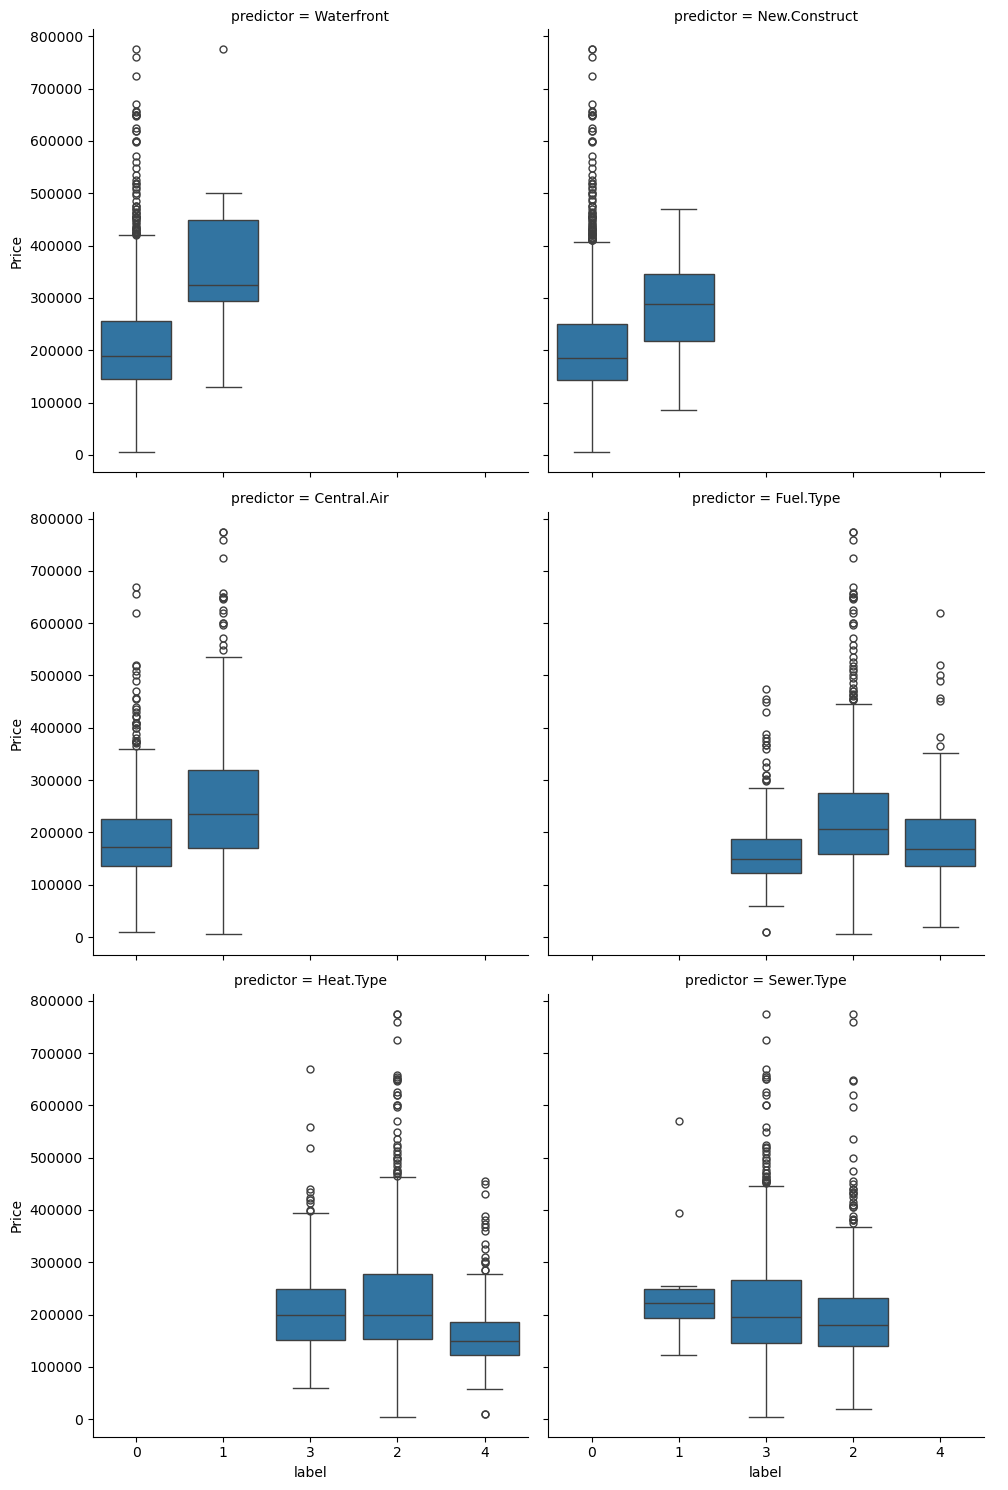

In [70]:
sns.catplot(
    data=cat_predictors, x='label', y='Price',
    col='predictor', kind='box', col_wrap=2
)

In [66]:
(numbers:= ['Price', 
             'Age', 
             'Land.Value', 
             'Living.Area', 
             'Lot.Size',
             'Rooms', 
             'Bedrooms', 
             'Bathrooms', 
             'Fireplaces', 
             'Pct.College']
)

(house_num := (
    homes
    .select([pl.col(c) for c in numbers])
    .drop_nulls()
))

Price,Age,Land.Value,Living.Area,Lot.Size,Rooms,Bedrooms,Bathrooms,Fireplaces,Pct.College
i64,i64,i64,i64,f64,i64,i64,f64,i64,i64
132500,42,50000,906,0.09,5,2,1.0,1,35
181115,0,22300,1953,0.92,6,3,2.5,0,51
109000,133,7300,1944,0.19,8,4,1.0,1,51
155000,13,18700,1944,0.41,5,3,1.5,1,51
86060,0,15000,840,0.11,3,2,1.0,0,51
…,…,…,…,…,…,…,…,…,…
289000,32,24200,2310,0.38,11,5,2.5,1,61
285000,37,36200,2564,0.94,11,4,2.5,1,61
194900,9,20400,1099,0.39,3,2,1.0,0,51


### Visualizing Relationships

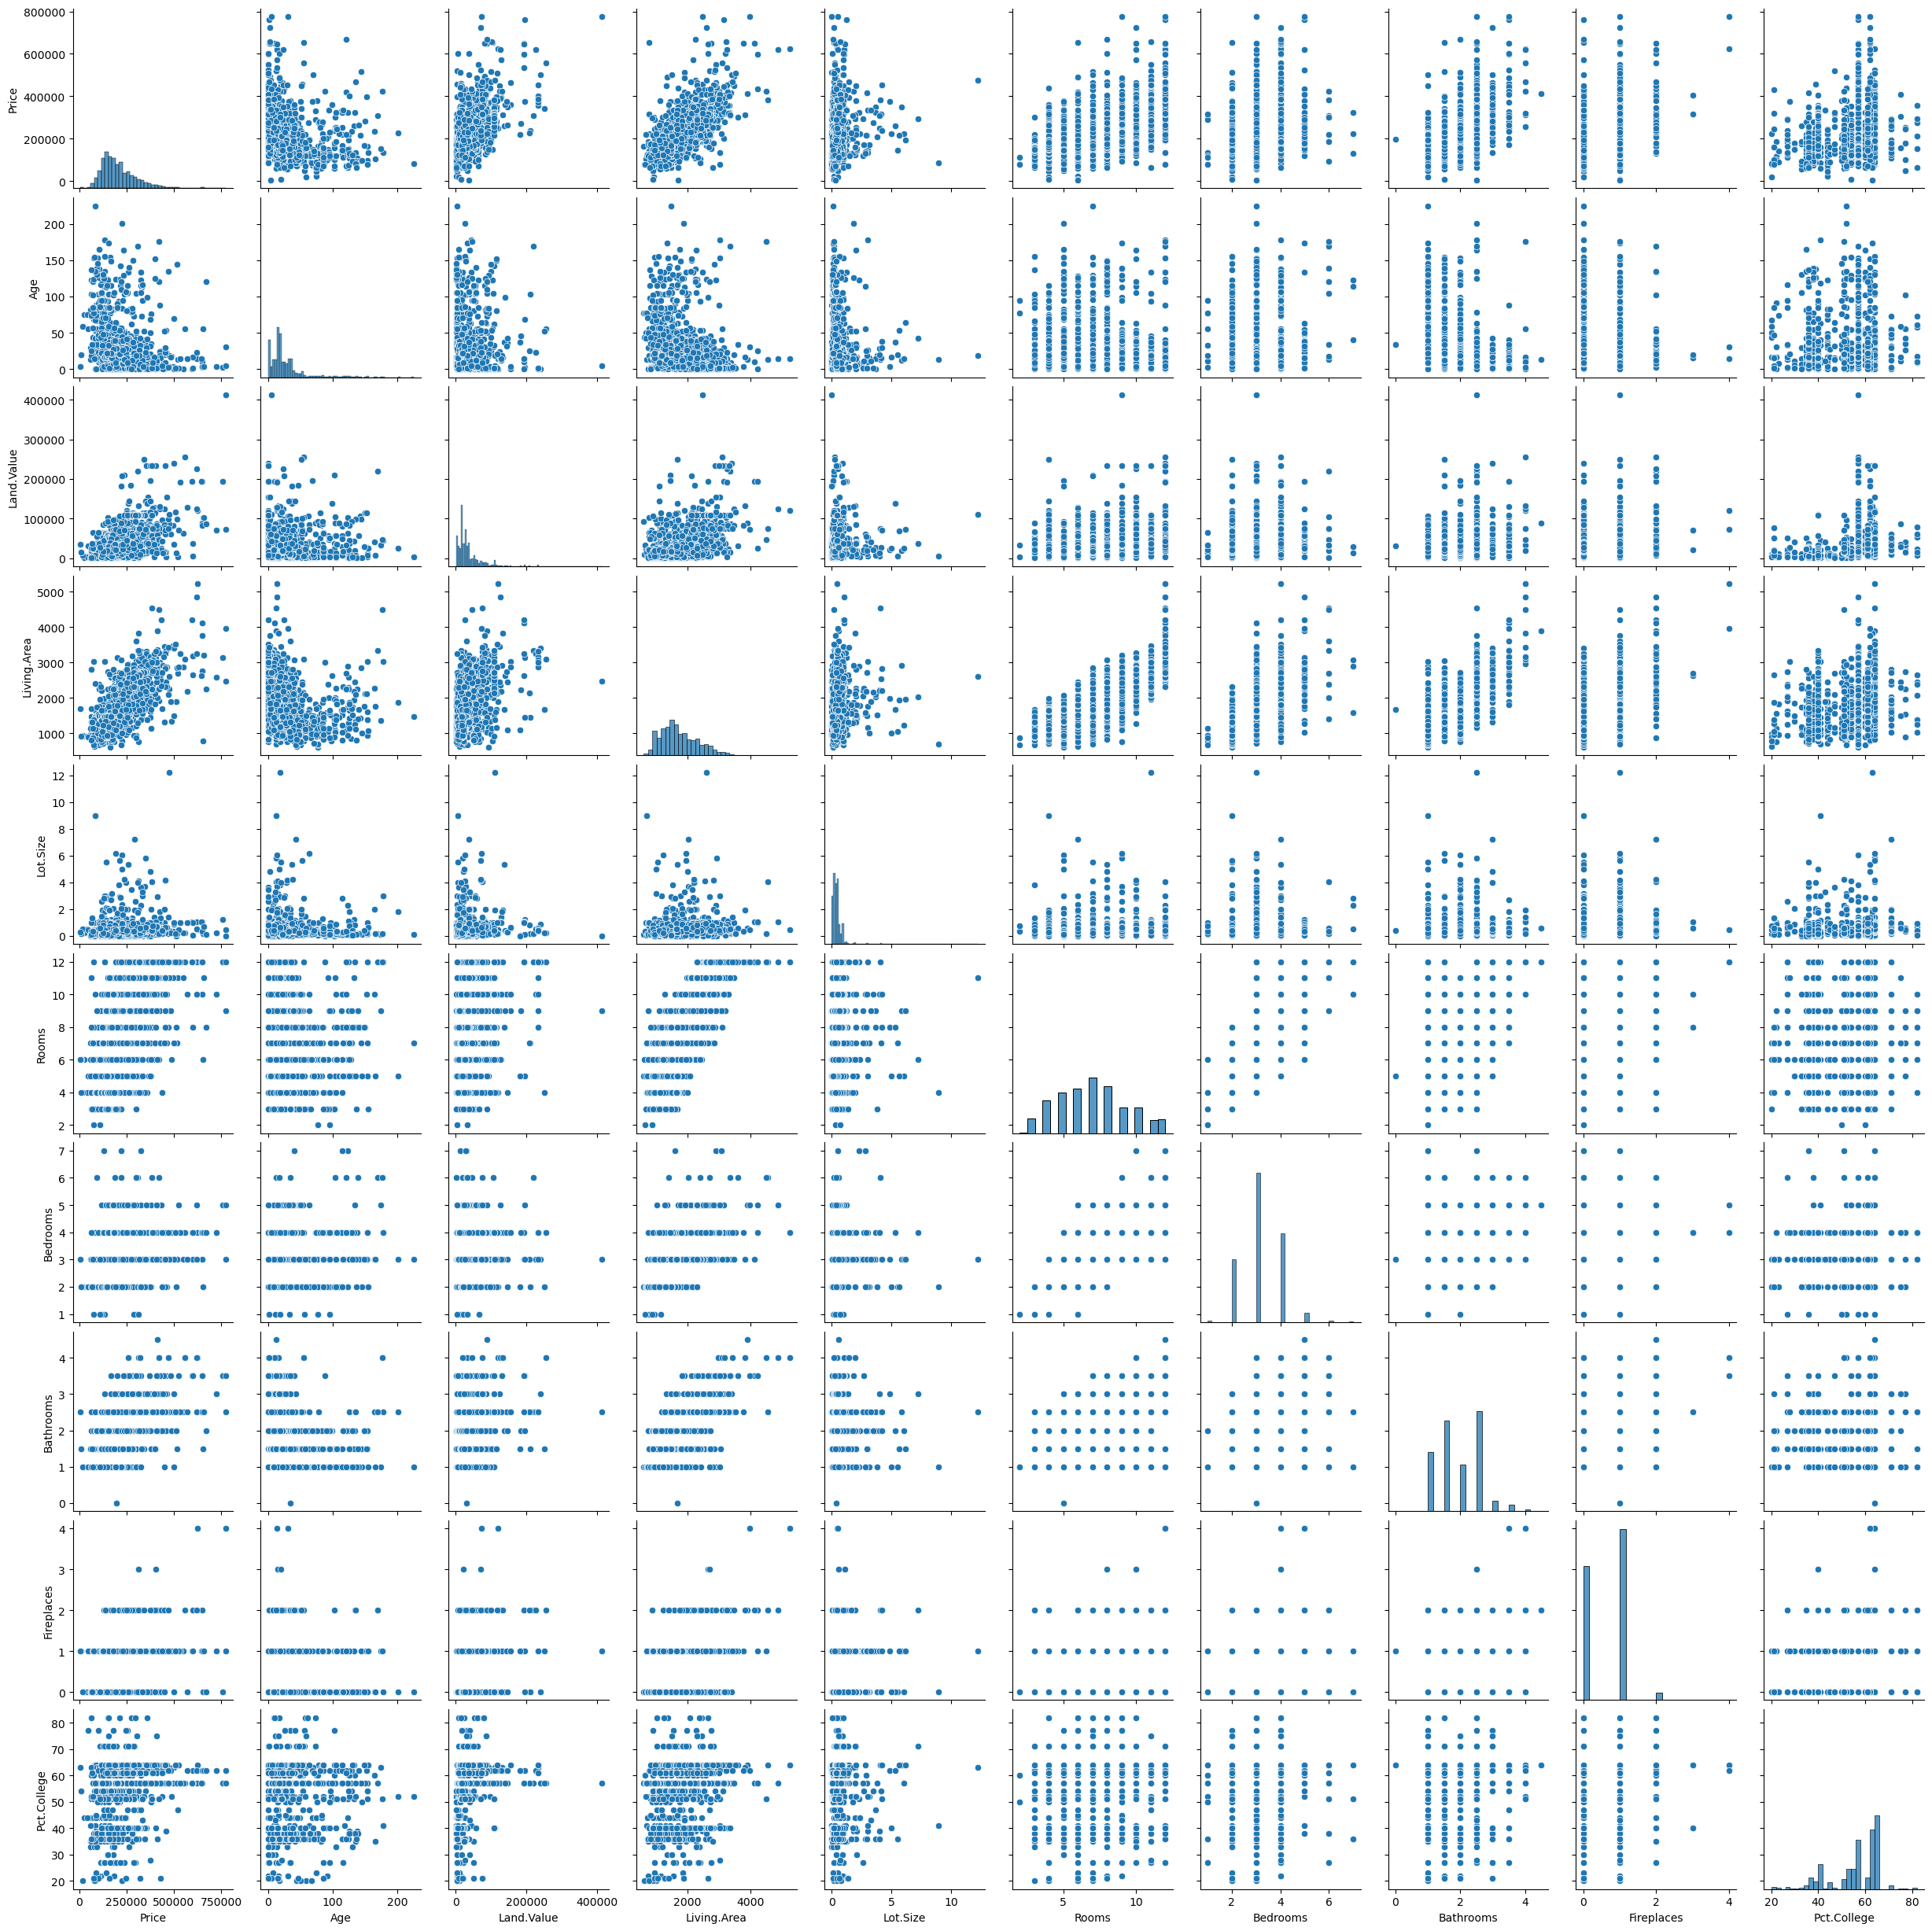

In [62]:
sns.pairplot(house_num.to_pandas())


### Pairplot

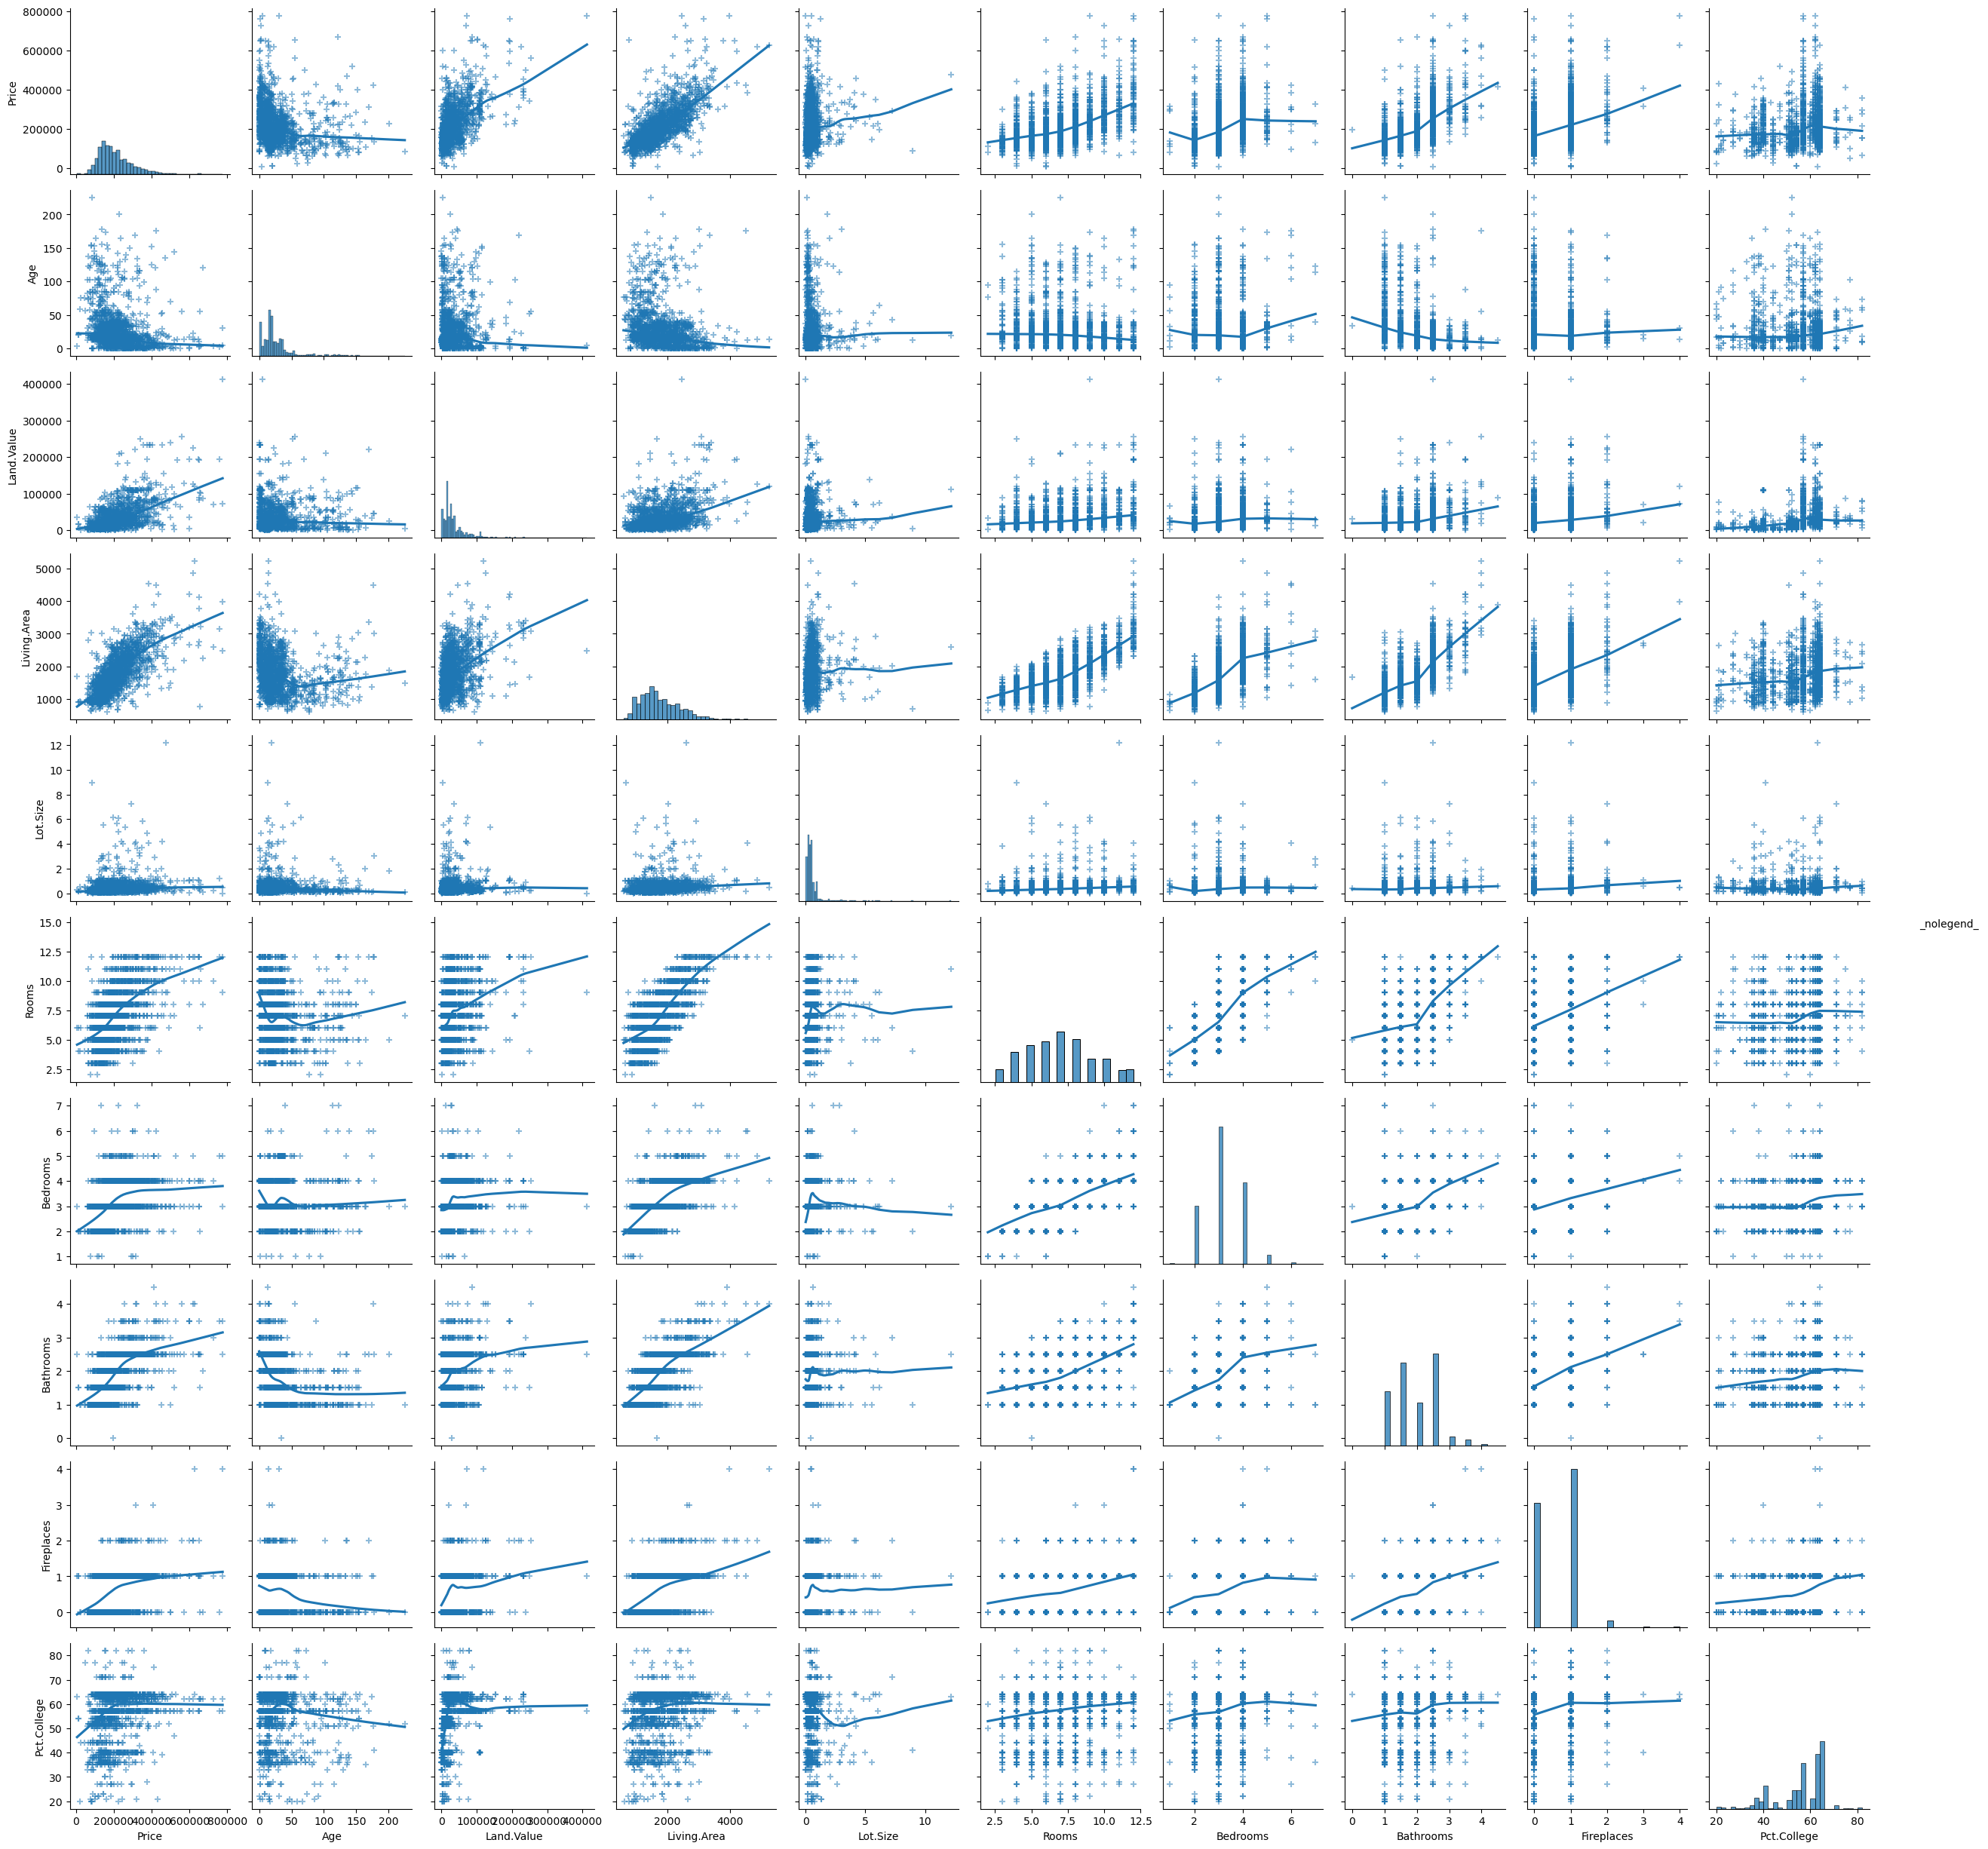

In [59]:
g = sns.PairGrid(house_num.to_pandas())
g.map_diag(sns.histplot)
g.map_offdiag(sns.regplot,
              lowess=True,
              marker="+",
              scatter_kws={'alpha': 0.5}
              )
g.add_legend()

**Summary

1. Living.Area vs Price is pretty much a straight upward line.
2. Land.Value vs Price also goes up, and the trend looks pretty smooth.
3. Age vs Price kinda goes down, but it’s not a perfect line.
4. Rooms/Bedrooms/Bathrooms/Fireplaces vs Price looks stepy going up.
5. Lot.Size vs Price is way weaker and is kinda flat and not super clear.
6. Overall, there are a bunch of crazy expensive outliers, and prices get more spread out as they get higher.